In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
from textblob import Word

In [146]:
pd.set_option('max_rows', 1000)

In [147]:
df_rev_sea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity/Project 1/reviews_seattle.csv')
df_lis_sea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity/Project 1/listings_seattle.csv')
df_cal_sea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity/Project 1/calendar_seattle.csv')

In [148]:
df_lis_orig = df_lis_sea.copy()

**1. BUSINESS UNDERSTANDING**

The P2P economy has surged in the past decade, reaching many kind of the service industries, including the lodging sector, being AirBnB the greatest contendor in the ring. In this notebook we will analyze the Seattle market for year 2016.

The questions to be answered are:

1. Should you trust the reviews to make a decision about where to stay in your next vacation?
2. What is the factor that most influences a listing's price?
3. If on a very low budget but willing to visiting Seattle, which neighborhood should I visit and in what month?
4. Is the pricing related to availability?
5. Are the prices being modified according to the season?

**2.DATA UNDERSTANDING**

**Reviews Understanding**

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
df_rev_sea.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [151]:
df_rev_sea.shape

(84849, 6)

There are 84849 reviews and the dataframe has 6 columns

In [152]:
df_rev_sea.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

The date is string type, it should be date type

In [153]:
df_rev_sea.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

There are 18 reviews whitout any comments

In [154]:
df_rev_sea.groupby('listing_id').count().shape

(3191, 5)

There are 3191 listings with comments

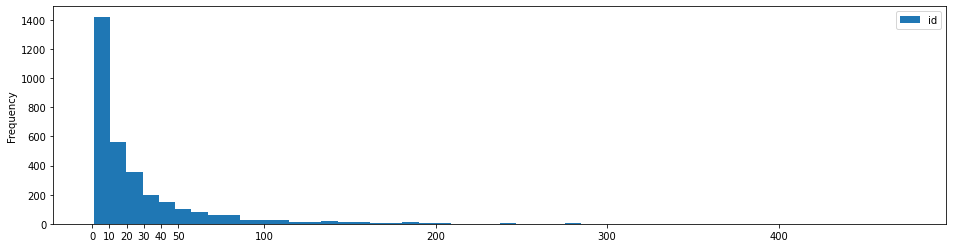

In [155]:
df_rev_sea.groupby('listing_id').count().sort_values(['id'],ascending=False)[['id']].plot(kind='hist',figsize=(16,4),bins=50,xticks=[0,10,20,30,40,50,100,200,300,400]);

Most listings have less than 10 reviews

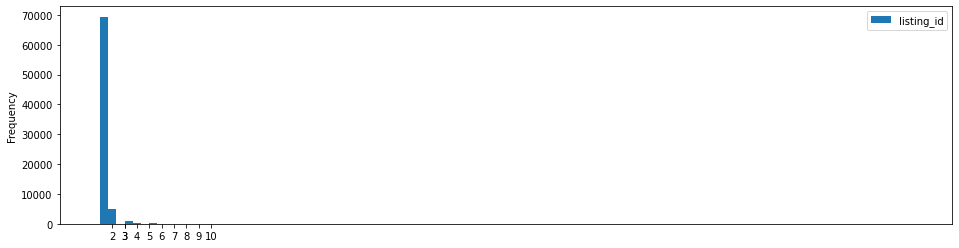

In [156]:
df_rev_sea.groupby('reviewer_id').count().sort_values('listing_id',ascending=False)[['listing_id']].plot(kind='hist',figsize=(16,4),bins=100,xticks=[2,3,4,3,5,6,7,8,9,10]);

Most people have made reviews just once

In [157]:
df_repeated = df_rev_sea.groupby(['reviewer_id','listing_id']).count().sort_values('id',ascending=False)
df_repeated[df_repeated.id>5].shape

(9, 4)

Only 9 people have made more than 5 reviews of the same listing

In [158]:
df_rev_sea.groupby(['reviewer_id','listing_id']).count().sort_values('id',ascending=False).iloc[0:1,:]

,,id,date,reviewer_name,comments
reviewer_id,listing_id,,,,
29590276,63733,11,11,11,11


Someone has made 11 reviews of the same listing. Next we can see those reviews

In [159]:
df_rev_sea.loc[(df_rev_sea.reviewer_id == 29590276) & (df_rev_sea.listing_id== 63733),:]

,listing_id,id,date,reviewer_id,reviewer_name,comments
42727,63733,28544537,2015-03-25,29590276,Gerd,We appreciated Irmgard and her hospitality. T...
42734,63733,31078348,2015-05-01,29590276,Gerd,Irmgard is a wonderful host. Our stay was ver...
42737,63733,33528315,2015-05-29,29590276,Gerd,Thank you Irmgard for sharing your beautiful r...
42739,63733,34076922,2015-06-04,29590276,Gerd,Irmgard is a great host. Thank you so much
42748,63733,37653979,2015-07-09,29590276,Gerd,"Irmgard is a great host. Clean towels, great ..."
42752,63733,44642061,2015-08-28,29590276,Gerd,Irmgard greeted us with a smile. Her organic p...
42757,63733,47247743,2015-09-17,29590276,Gerd,Irmgard is a very welcoming host. Greeted us ...
42758,63733,50065015,2015-10-09,29590276,Gerd,Irmgard is a great host. Our stay was very co...
42765,63733,56302027,2015-12-12,29590276,Gerd,Irmgard is a great host. Cozy place to stay. ...
42766,63733,57121261,2015-12-22,29590276,Gerd,We appreciated Irmgard's cozy and quiet guest ...


**Listing Understanding**

In [160]:
df_lis_sea.shape

(3818, 92)

There are 3818 listings and 92 columns in the data frame

In [161]:
df_lis_sea_null = df_lis_sea.isna().sum().sort_values(ascending=False)
df_lis_sea_null/df_lis_sea.shape[0]

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

License column is empty and square feet column is almost empty

In [162]:
df_lis_sea.apply(pd.unique).apply(lambda x: len(x))

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3479
space                               3120
description                         3742
experiences_offered                    1
neighborhood_overview               2507
notes                               2000
transit                             2575
thumbnail_url                       3499
medium_url                          3499
picture_url                         3818
xl_picture_url                      3499
host_id                             2751
host_url                            2751
host_name                           1467
host_since                          1381
host_location                        121
host_about                          2012
host_response_time                     5
host_response_rate                    46
host_acceptance_

This will let us check columns with a unique value that can be deleted because don't add information to discriminate

In [163]:
df_lis_sea.apply(pd.unique)

id                                  [241032, 953595, 3308979, 7421966, 278830, 595...
listing_url                         [https://www.airbnb.com/rooms/241032, https://...
scrape_id                                                            [20160104002432]
last_scraped                                                             [2016-01-04]
name                                [Stylish Queen Anne Apartment, Bright & Airy Q...
summary                             [nan, Chemically sensitive? We've removed the ...
space                               [Make your self at home in this charming one-b...
description                         [Make your self at home in this charming one-b...
experiences_offered                                                            [none]
neighborhood_overview               [nan, Queen Anne is a wonderful, truly functio...
notes                               [nan, What's up with the free pillows?  Our ho...
transit                             [nan, Convenient b

Here we can evaluate the data present by column. State column for example, is irrelevant since both values represent the same information

In [164]:
df_lis_sea.isna().sum(axis=1).max()

33

There are no empty rows. 33 is the maximum amount of empty columns for a listing

In [165]:
df_lis_sea.dtypes.to_frame()

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
name,object
summary,object
space,object
description,object
experiences_offered,object
neighborhood_overview,object


Price related columns are strings, not numeric as expected. The price is preceded by the $ sign. The host response time, host_response_rate and host_acceptance_rate are text fields, they should be numeric or data types. The host_since field is a string but it should be data type.

In [166]:
df_lis_sea.shape[0] - df_lis_sea[['price','weekly_price','monthly_price']].isna().sum() 

price            3818
weekly_price     2009
monthly_price    1517
dtype: int64

 This result could be interpreted as if despite all listings can be rented for some days, 2009 listings are rented by days and by the week and 1517 listings can be rented by days, weeks or months.

In [167]:
df_lis_sea.groupby('guests_included').count()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
guests_included,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,92,92,92,92,92,91,84,92,92,69,57,76,86,86,92,86,92,92,92,92,92,72,85,85,78,92,92,92,79,92,92,92,92,92,92,68,92,92,92,92,...,92,92,92,92,92,0,92,44,38,49,69,92,92,92,92,92,92,92,92,92,92,92,85,85,85,85,85,85,85,85,85,92,0,92,92,92,92,92,92,85
1,2275,2275,2275,2275,2275,2172,1827,2275,2275,1576,1263,1639,2099,2099,2275,2099,2275,2275,2273,2273,2268,1663,1900,1900,1747,2273,2273,2273,2063,2273,2273,2275,2273,2273,2275,1987,2275,2275,2275,2275,...,2261,2271,2274,2275,2275,39,2275,1093,768,844,1463,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,1801,1801,1788,1780,1784,1780,1785,1782,1781,2275,0,2275,2275,2275,2275,2275,2275,1801
2,989,989,989,989,989,945,901,989,989,777,627,791,924,924,989,924,989,989,989,989,988,849,901,901,849,989,989,989,932,989,989,989,989,989,989,913,989,989,989,989,...,988,987,989,989,989,37,989,610,480,601,823,989,989,989,989,989,989,989,989,989,989,989,898,898,897,895,895,895,896,896,896,989,0,989,989,989,989,989,989,898
3,80,80,80,80,80,76,74,80,80,60,42,63,70,70,80,70,80,80,80,80,80,68,70,70,63,80,80,80,77,80,80,80,80,80,80,76,80,80,80,80,...,80,80,80,80,80,4,80,50,50,62,75,80,80,80,80,80,80,80,80,80,80,80,75,75,74,74,74,74,74,74,74,80,0,80,80,80,80,80,80,75
4,237,237,237,237,237,223,225,237,237,190,141,196,203,203,237,203,237,237,237,237,237,192,214,214,196,237,237,237,231,237,237,237,237,237,237,227,237,237,237,237,...,236,237,237,237,237,9,237,138,124,183,223,237,237,237,237,237,237,237,237,237,237,237,204,204,202,201,202,201,202,201,201,237,0,237,237,237,237,237,237,204
5,28,28,28,28,28,25,23,28,28,22,14,23,21,21,28,21,28,28,28,28,28,24,22,22,21,28,28,28,26,28,28,28,28,28,28,24,28,28,28,28,...,28,28,28,28,28,2,28,17,13,24,26,28,28,28,28,28,28,28,28,28,28,28,24,24,22,22,22,22,22,22,22,28,0,28,28,28,28,28,28,24
6,71,71,71,71,71,66,70,71,71,56,38,59,57,57,71,57,71,71,71,71,71,55,62,62,54,71,71,71,66,71,71,71,71,71,71,65,71,71,71,71,...,71,71,71,71,71,2,71,40,30,62,66,71,71,71,71,71,71,71,71,71,71,71,66,66,66,66,66,66,66,66,66,71,0,71,71,71,71,71,71,66
7,14,14,14,14,14,14,14,14,14,12,9,13,13,13,14,13,14,14,14,14,14,9,13,13,13,14,14,14,14,14,14,14,14,14,14,12,14,14,14,14,...,14,14,14,14,14,0,14,6,7,13,13,14,14,14,14,14,14,14,14,14,14,14,12,12,12,12,12,12,12,12,12,14,0,14,14,14,14,14,14,12
8,24,24,24,24,24,22,24,24,24,19,16,19,19,19,24,19,24,24,24,24,24,20,20,20,17,24,24,24,22,24,24,24,24,24,24,22,24,24,24,24,...,24,24,24,24,24,2,24,9,7,21,23,24,24,24,24,24,24,24,24,24,24,24,20,20,19,19,19,19,19,19,19,24,0,24,24,24,24,24,24,20


Most listings are offered for just one guest

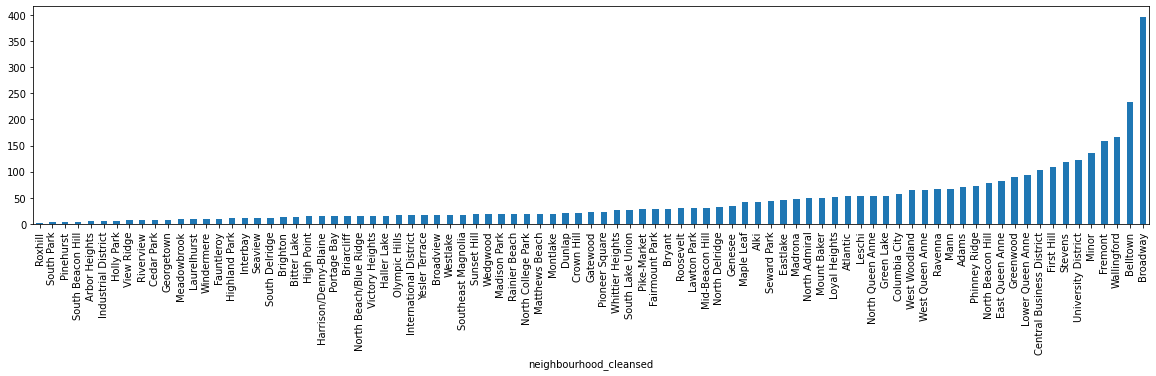

In [168]:
df_lis_sea.groupby('neighbourhood_cleansed').count().id.sort_values().plot(kind='bar',figsize=(20,4))

Most listings are located in a neighborhood called Broadway

In [169]:
df_lis_sea.groupby('cancellation_policy').count().sort_values('id')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
cancellation_policy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
flexible,1150,1150,1150,1150,1150,1121,784,1150,1150,719,542,761,1067,1067,1150,1067,1150,1150,1149,1149,1144,744,898,898,798,1149,1149,1149,1001,1149,1149,1150,1149,1149,1150,978,1150,1150,1150,1150,...,1146,1150,1149,1150,1150,8,1150,511,343,293,582,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,788,788,780,775,776,775,777,776,775,1150,0,1150,1150,1150,1150,1150,788
moderate,1251,1251,1251,1251,1251,1200,1145,1251,1251,1016,801,1059,1156,1156,1251,1156,1251,1251,1250,1250,1250,1020,1094,1094,1024,1250,1250,1250,1158,1250,1250,1251,1250,1250,1251,1126,1251,1251,1251,1251,...,1246,1249,1251,1251,1251,33,1251,741,545,638,949,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1140,1140,1134,1129,1132,1129,1133,1131,1131,1251,0,1251,1251,1251,1251,1251,1140
strict,1417,1417,1417,1417,1417,1320,1320,1417,1417,1051,869,1064,1275,1275,1417,1275,1417,1417,1417,1417,1416,1195,1303,1303,1223,1417,1417,1417,1359,1417,1417,1417,1417,1417,1417,1298,1417,1417,1417,1417,...,1410,1413,1417,1417,1417,56,1417,757,629,935,1257,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417,1263,1263,1257,1256,1257,1256,1257,1256,1256,1417,0,1417,1417,1417,1417,1417,1263


The listings are somewhat equally distributed by cancellation policy

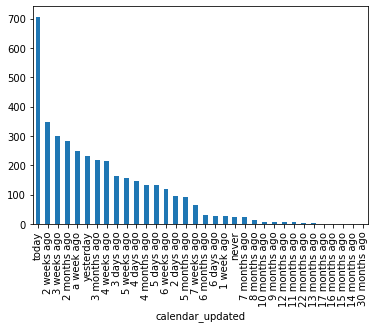

In [170]:
df_lis_sea.groupby('calendar_updated').count().id.sort_values(ascending=False).plot(kind='bar')
# There are listings' calendars that haven´t been updated for more than a year

Most listings' calendars were updated the same day the data was scrapped. There are some listings whose calendar has not been updated for more than a year.

In [171]:
df_lis_sea.groupby('host_is_superhost').count()/df_lis_sea.shape[0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
host_is_superhost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,0.795705,0.795705,0.795705,0.795705,0.795705,0.756155,0.660555,0.795705,0.795705,0.563122,0.437926,0.584861,0.725773,0.725773,0.795705,0.725773,0.795705,0.795705,0.795705,0.795705,0.794133,0.590361,0.667889,0.667889,0.606862,0.795705,0.795705,0.726296,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.702986,0.795705,0.795705,0.795705,0.795705,0.794133,...,0.794133,0.795443,0.795705,0.795705,0.017810,0.795705,0.405710,0.301205,0.368779,0.568360,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.639078,0.639078,0.63384,0.630959,0.632268,0.630959,0.632792,0.631744,0.631482,0.795705,0.0,0.795705,0.795705,0.795705,0.795705,0.795705,0.795705,0.639078
t,0.203772,0.203772,0.203772,0.203772,0.203772,0.196962,0.190152,0.203772,0.203772,0.166317,0.141173,0.170246,0.189890,0.189890,0.203772,0.189890,0.203772,0.203772,0.203772,0.203772,0.203772,0.184652,0.195128,0.195128,0.190676,0.203772,0.203772,0.195128,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.187533,0.203772,0.203772,0.203772,0.203772,0.203510,...,0.203772,0.203772,0.203772,0.203772,0.007596,0.203772,0.119958,0.095862,0.119958,0.161603,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.196700,0.196700,0.19670,0.196700,0.196700,0.196700,0.196700,0.196700,0.196700,0.203772,0.0,0.203772,0.203772,0.203772,0.203772,0.203772,0.203772,0.196700


20% of listings are posted by superhosts

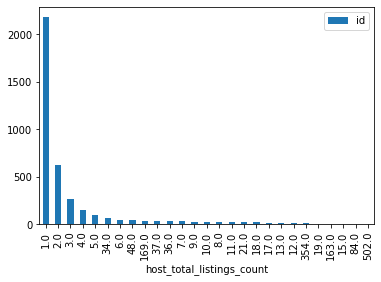

In [172]:
df_lis_sea.groupby('host_total_listings_count').count().sort_values('id',ascending=False)[['id']].plot(kind='bar');

Most hosts own a single listing

In [173]:
df_lis_sea.groupby('host_identity_verified').count()/df_lis_sea.shape[0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
host_identity_verified,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,0.214510,0.214510,0.214510,0.214510,0.214510,0.205867,0.159770,0.214510,0.214510,0.133054,0.097957,0.142221,0.194081,0.194081,0.214510,0.194081,0.214510,0.214510,0.214510,0.214510,0.212939,0.130173,0.164484,0.164484,0.145102,0.214510,0.214510,0.214510,0.189104,0.214510,0.214510,0.214510,0.214510,0.214510,0.183342,0.214510,0.214510,0.214510,0.214510,0.214248,...,0.213986,0.214510,0.214510,0.214510,0.003929,0.214510,0.103457,0.076218,0.091409,0.131221,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.150340,0.150340,0.149555,0.148507,0.148769,0.148507,0.149031,0.148769,0.148769,0.214510,0.0,0.214510,0.214510,0.214510,0.214510,0.214510,0.214510,0.150340
t,0.784966,0.784966,0.784966,0.784966,0.784966,0.747250,0.690938,0.784966,0.784966,0.596386,0.481142,0.612886,0.721582,0.721582,0.784966,0.721582,0.784966,0.784966,0.784966,0.784966,0.784966,0.644840,0.698533,0.698533,0.652436,0.784966,0.784966,0.784966,0.732321,0.784966,0.784966,0.784966,0.784966,0.784966,0.707177,0.784966,0.784966,0.784966,0.784966,0.783394,...,0.783918,0.784704,0.784966,0.784966,0.021477,0.784966,0.422211,0.320849,0.397328,0.598743,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.685437,0.685437,0.680985,0.679151,0.680199,0.679151,0.680461,0.679675,0.679413,0.784966,0.0,0.784966,0.784966,0.784966,0.784966,0.784966,0.784966,0.685437


This data correlates very well with host_is_superhost field, which makes sense.

In [174]:
df_lis_sea.groupby('bedrooms').count()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bathrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
bedrooms,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,372,372,372,372,372,371,308,372,372,287,234,294,342,342,372,342,372,372,371,371,368,268,325,325,314,371,371,371,336,371,371,372,371,371,372,324,372,372,372,372,...,372,372,372,372,8,372,202,155,192,276,372,372,372,372,372,372,372,372,372,372,372,372,309,309,307,307,307,307,307,307,307,372,0,372,372,372,372,372,372,309
1.0,2417,2417,2417,2417,2417,2296,2027,2417,2417,1723,1399,1813,2305,2305,2417,2305,2417,2417,2416,2416,2413,1895,2079,2079,1926,2416,2416,2416,2210,2416,2416,2417,2416,2416,2417,2136,2417,2417,2417,2417,...,2404,2416,2417,2417,47,2417,1293,957,1035,1612,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2021,2021,2013,2004,2007,2004,2009,2007,2007,2417,0,2417,2417,2417,2417,2417,2417,2021
2.0,640,640,640,640,640,609,565,640,640,488,368,480,547,547,640,547,640,640,640,640,640,495,572,572,514,640,640,640,604,640,640,640,640,640,640,584,640,640,640,640,...,637,640,640,640,26,640,315,273,365,552,640,640,640,640,640,640,640,640,640,640,640,640,538,538,533,531,533,531,533,531,530,640,0,640,640,640,640,640,640,538
3.0,283,283,283,283,283,262,258,283,283,208,154,214,218,218,283,218,283,283,283,283,283,223,236,236,220,283,283,283,269,283,283,283,283,283,283,261,283,283,283,283,...,283,283,283,283,12,283,145,100,197,254,283,283,283,283,283,283,283,283,283,283,283,283,240,240,236,236,236,236,236,236,236,283,0,283,283,283,283,283,283,240
4.0,69,69,69,69,69,68,61,69,69,57,36,59,51,51,69,51,69,69,69,69,69,45,51,51,42,69,69,69,64,69,69,69,69,69,69,63,69,69,69,69,...,69,69,69,69,2,69,37,20,49,62,69,69,69,69,69,69,69,69,69,69,69,69,52,52,52,52,52,52,52,52,52,69,0,69,69,69,69,69,69,52
5.0,24,24,24,24,24,24,17,24,24,15,13,15,22,22,24,22,24,24,24,24,24,20,20,20,18,24,24,24,23,24,24,24,24,24,24,23,24,24,24,24,...,24,24,24,24,1,24,8,7,18,21,24,24,24,24,24,24,24,24,24,24,24,24,18,18,17,17,17,17,17,17,17,24,0,24,24,24,24,24,24,18
6.0,6,6,6,6,6,5,6,6,6,5,5,5,6,6,6,6,6,6,6,6,6,6,5,5,4,6,6,6,5,6,6,6,6,6,6,5,6,6,6,6,...,6,6,6,6,1,6,5,3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6
7.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


Most listings offer one bedroom

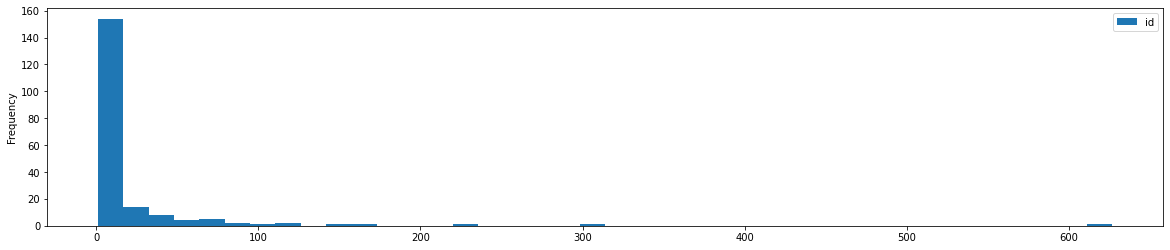

In [175]:
df_lis_sea.groupby('number_of_reviews').count()[['id']].plot(kind='hist',figsize=(20,4),bins=40);

Most listings have less than 10 reviews.

**Calendar Understanding**

In [176]:
df_cal_sea.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [177]:
df_cal_sea.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

The missing price data means that the listing is not available for renting

In [178]:
df_cal_sea.shape

(1393570, 4)

In [179]:
df_cal_sea.shape[0]/365

3818.0

We check that we have the same amount of listings as the listings dataframe

In [180]:
df_cal_sea.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

As for previous datasets, the date is expressed as a string, as well as the price.

In [181]:
df_cal_sea.apply(pd.unique).apply(lambda x: len(x))

listing_id    3818
date           365
available        2
price          670
dtype: int64

Here we check the amount of unique values for each column

# 3 Data Preparation

**Cleaning Reviews data**

In [182]:
df_rev = df_rev_sea.dropna()

Taking into account that thare are only 18 rows missing comments, we can drop those rows

We will use TextBlob library to run sentiment analysis on the reviews. This will generate a polarity and a subjectivity for each review. The polarity range is from -1 to 1, being 1 a totally positive review an -1 a totally negative review. The subjectivity expresses the  reviewer's objectivity, being 0 a totally objective review and 1 a totally subjective review

In [183]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [184]:
df_pol = df_rev['comments'].apply(lambda rev: TextBlob(rev).sentiment.polarity)

In [185]:
df_pol.name = 'polarity'

In [186]:
df_subj = df_rev.comments.apply(lambda rev: TextBlob(rev).sentiment.subjectivity)

In [187]:
df_subj.name = 'subjectivity'

We will concatenate those dataframes with the reviews dataframe, in order to perform some sentiment analysis on it later on

In [188]:
df_rev = pd.concat([df_rev,df_pol,df_subj],axis=1)

In [189]:
df_1 = df_rev.groupby('listing_id').count()[['id']]

In [190]:
df_2 = df_rev.groupby('listing_id').mean()[['polarity','subjectivity']]

In [191]:
df_reviews = pd.concat([df_1,df_2],axis=1).rename(columns={'id':'num_reviews'})

In [192]:
df_reviews.head(3)

,num_reviews,polarity,subjectivity
listing_id,,,
4291,35,0.368664,0.570464
5682,296,0.363551,0.618317
6606,52,0.358105,0.624455


**Cleaning listing data**

The first criteria used to clean listing data is to drop those columns with a unique value, since those do not add information to discriminate among listings

In [193]:
df_drop = df_lis_sea.apply(pd.unique).apply(lambda x: len(x)) == 1
df_lis_sea.drop(columns=df_drop[df_drop==1].index,inplace=True)

The next criteria will be to drop those columns that have more than 50% information missing

In [194]:
df_drop = df_lis_sea.isna().sum()/df_lis_sea.shape[0]
df_lis_sea.drop(columns=df_drop[df_drop > 0.6].index,inplace=True)

The next criteria will be to drop columns with extensive text, metadata that can not be used to analize the data (picture_url for example), among others.

In [195]:
df_lis_sea.drop(columns=['listing_url','name','summary','space','description','notes','transit','thumbnail_url','medium_url', 'picture_url', 'xl_picture_url', 
                         'host_id', 'host_url','host_name', 'host_since', 'host_location', 'host_about','host_acceptance_rate','host_thumbnail_url', 
                         'host_picture_url','host_neighbourhood','host_total_listings_count','host_verifications','street','neighbourhood','neighbourhood_group_cleansed', 
                         'city', 'state','smart_location', 'is_location_exact', 'weekly_price','require_guest_profile_picture', 'require_guest_phone_verification',
                          'calculated_host_listings_count','last_review'],inplace=True)

Let's extract the adjectives from the neighbour_overview column using TextBlob library, since we could use that data to better characterize the neighborhood

In [196]:
def lemmatize(overview):
  tag_list = []
  for word, tag in TextBlob(overview).tags:
   if tag in ['JJ','JJR','JJS']:
    tag_list.append(Word(word).lemmatize('a').lower())
  
  return tag_list 

In [197]:
df_lis_sea['neighborhood_overview'] = df_lis_sea.neighborhood_overview.apply(lambda text: lemmatize(text) if pd.notnull(text) else text)

Les's create a dataframe with neighbourhood and neighbourhood_overview information to be analized separately and then lest's drop the overview column from the df_lis_sea dataset

In [198]:
df_overview = df_lis_sea[['neighbourhood_cleansed','neighborhood_overview']]

In [199]:
adjectives =set()
for adj_list in df_overview.neighborhood_overview:
  if isinstance(adj_list, list) and ~(not adj_list): 
    for adj in adj_list :
      adjectives.add(adj)

In [200]:
len(adjectives)

1666

In [201]:
df_lis_sea.drop(columns='neighborhood_overview',inplace=True)

As security deposit column has more than half of the values missing, we will transform it in a binary column representing if the security deposit was requested or not, then the security_deposit column will be dropped

In [202]:
df_lis_sea['secdep_present'] = df_lis_sea['security_deposit'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [203]:
df_lis_sea.drop(columns='security_deposit',inplace=True)

Next let's convert the host_response_rate, cleaning_fee, price and extra_people columns from text to float. To accomplish that we need to drop the % sign first, then convert from string to float

In [204]:
def to_number(text):
  return int(''.join([s for s in list(text) if (s.isdigit())]))

In [205]:
df_lis_sea['host_response_rate'] = df_lis_sea['host_response_rate'].apply(lambda x: to_number(x) if pd.notnull(x) else x)

In [206]:
df_lis_sea['cleaning_fee'] = df_lis_sea['cleaning_fee'].apply(lambda x: to_number(x)/100 if pd.notnull(x) else x)

In [207]:
df_lis_sea['price'] = df_lis_sea['price'].apply(lambda x: to_number(x)/100 if pd.notnull(x) else x)

In [208]:
df_lis_sea['extra_people'] = df_lis_sea['extra_people'].apply(lambda x: to_number(x)/100 if pd.notnull(x) else x)

Let's now transform the amenities column into several columns of binary type. First we will create a function that generates a set of posible amenities

In [209]:
def extract_amenities_set(column):
  amenities =set()
  for adj_list in column:
    word_list = adj_list.split(',')
    for word in word_list:
      amenities.add(''.join([char for char in list(word) if char not in ['{','}','"']]))
  
  return amenities 

In [210]:
amenities = extract_amenities_set(df_lis_sea.amenities)

In [211]:
amenities.remove('')

Then we will transform the amenities column into a list of amenities for each listing

In [212]:
def extract_atributes(cel_content):
  atributes = []
  word_list = cel_content.split(',')
  for word in word_list:
    atributes.append(''.join([char for char in list(word) if char not in ['{','}','"']]))
  
  return atributes

In [213]:
df_lis_sea['amenities'] = df_lis_sea.amenities.apply(extract_atributes) 

Now, we will create the empty columns for each amenity

In [214]:
for amenity in amenities:
  df_lis_sea.amenity = np.nan

In [215]:
for amenity in amenities:
  df_lis_sea[amenity] = df_lis_sea.amenities.apply(lambda x: 1 if amenity in x else 0 )

Let's drop the amenities column

In [216]:
df_lis_sea.drop('amenities',axis=1,inplace=True)

Now let's transform the first review column from date to days transcurred since first review

In [217]:
from datetime import datetime
from datetime import date

In [218]:
df_lis_sea['first_review'] = df_lis_sea.first_review.apply(lambda x: (date(2016,1,4) - datetime.strptime(x,"%Y-%m-%d").date()).days  if pd.notnull(x) else x)

We will transform the calendar_updated column to numeric. To reflect the fact that there are some listings that have never been updated, those listings that have not been updated for more than a year will be grouped as not updated in a year category

In [219]:
def extract_number(text):
  
  num_dict = {'day':1, 'week':7, 'month':30, 'today':0, 'yesterday':1, 'never':365}

  str_list = text.split(' ')
  if len(str_list) == 1:
    num = num_dict[str_list[0]]
  elif str_list[0] == 'a':
    num = num_dict[TextBlob(str_list[1]).words.singularize()[0]]
  elif int(str_list[0]) > 12 and (TextBlob(str_list[1]).words.singularize()[0] == 'month'):
    num = 365
  else:
    num = int(str_list[0])*num_dict[TextBlob(str_list[1]).words.singularize()[0]]

  return num


In [220]:
df_lis_sea['calendar_updated'] = df_lis_sea.calendar_updated.apply(extract_number)

We can now impute the missing values with each columns's mode

In [221]:
df_lis = df_lis_sea.apply(lambda col: col.fillna(col.mode()[0]))

In [222]:
df_lis.isna().sum().mean()

0.0

Finally we will create the dummy columns for the categorical columns

In [223]:
cat_df = df_lis.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

In [224]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [225]:
df_lis_def = create_dummy_df(df_lis,cat_cols_lst,dummy_na=False)

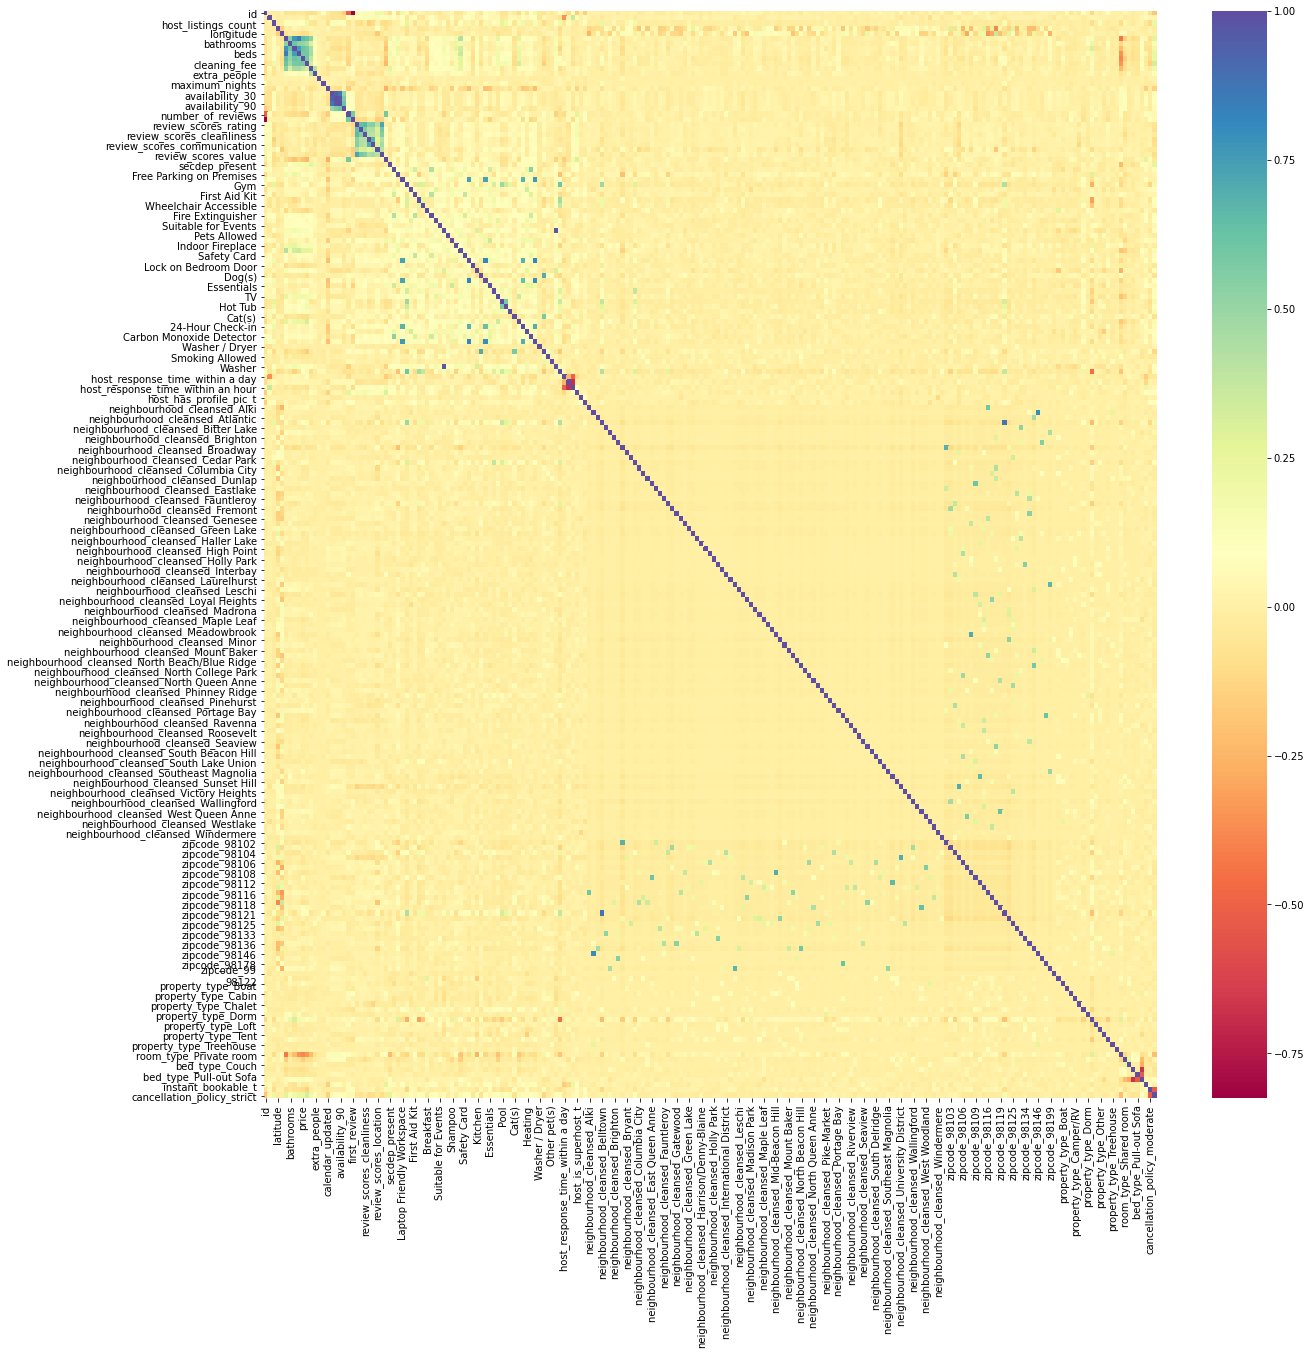

In [226]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_lis_def.corr(),ax=ax,cmap='Spectral');

Since there are highly correlated features (zip code and neighborhood) that coould hurt our modeling, we are going to drop those from the dataframe

In [227]:
df_lis_def.drop(columns=['zipcode_98102', 'zipcode_98103','zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 
                        'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 
                       'zipcode_98119', 'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
                       'zipcode_98144', 'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199', 'zipcode_99\n98122'],inplace=True)

***Cleaning calendar data***

First we will extract a list of listings whose calendar has not been updated in more than six months

In [228]:
df_update = df_lis_orig.calendar_updated.apply(extract_number).rename('updated')

In [229]:
df_lis_calendar = pd.concat([df_lis_orig,df_update],axis=1)

In [230]:
not_updated = list(df_lis_calendar[df_lis_calendar['updated'] >180].id)

Now that we ha ve a list of listings that have not been updated for more than six months, we can drop those listing from the calendar dataframe

In [231]:
df_cal_sea.set_index('listing_id',inplace=True)

In [232]:
df_cal_sea.drop(labels=not_updated,inplace=True)

In [233]:
df_cal_sea['price'] = df_cal_sea['price'].apply(lambda x: to_number(x)/100 if pd.notnull(x) else x)

In [234]:
df_cal_sea['month'] = df_cal_sea.date.apply(lambda date: date[5:7])

In [235]:
df_cal_sea['day'] = df_cal_sea.date.apply(lambda date: date[8:])

In [236]:
df_cal_sea['year'] = df_cal_sea.date.apply(lambda date: date[:4])

In [237]:
df_cal_sea.reset_index(inplace=True)

Let's create a neighborhood column for the calendar dataframe. First we will create a dictionary of listing id and neighborhood and then we will use the dict and map function to create the column

In [238]:
id_dict=pd.Series(df_lis_sea.neighbourhood_cleansed.values,index=df_lis_sea.id).to_dict()

In [239]:
df_cal_sea['neighborhood'] = df_cal_sea.listing_id.map(id_dict)

In [240]:
df_cal_sea['available'] = df_cal_sea.available.map({'t': 1,'f':0})

In [241]:
df_cal_sea.head(4)

,listing_id,date,available,price,month,day,year,neighborhood
0,241032,2016-01-04,1,85.0,01,04,2016,West Queen Anne
1,241032,2016-01-05,1,85.0,01,05,2016,West Queen Anne
2,241032,2016-01-06,0,NaN,01,06,2016,West Queen Anne
3,241032,2016-01-07,0,NaN,01,07,2016,West Queen Anne


# 4. Data Modeling

We will fit a basic linear regression model to our data and then we'll evaluate the r squared score

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [243]:
X = df_lis_def.drop('price',axis=1)
y = df_lis_def.price

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [245]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [246]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [247]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [248]:
print(train_score,test_score)

0.6448701035899558 0.6160087232783416


We can see that our model is underfitting, since the r2 score is low for the training set and similar to the r2 score for the test set

Let's try now using a knn regressor from sklearn with n = 3 to see if we can get improvements in r2 scores

In [249]:
from sklearn.neighbors import KNeighborsRegressor

In [250]:
knn_model = KNeighborsRegressor(n_neighbors=3,weights='distance')

In [251]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [252]:
y_test_preds = knn_model.predict(X_test)
y_train_preds = knn_model.predict(X_train)

In [253]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [254]:
print(train_score,test_score)

1.0 -0.4573646329755501


Now we clearly have overfitting, since the r2 score is 1 for the training set and the r2 score for the test set is negative, which indicates that our model performs really bad to predict the response and even a horizontal line would do better.

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [257]:
gridsearch.best_params_

{'n_neighbors': 38}

In [258]:
knn_model = KNeighborsRegressor(n_neighbors=38,weights='distance')
knn_model.fit(X_train, y_train)
y_test_preds = knn_model.predict(X_test)
y_train_preds = knn_model.predict(X_train)
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print(train_score,test_score)

1.0 -0.13561874439764776


# 5. Data Evaluation

**Question 1: Should you trust the reviews to make a decision about where to stay in your next vacation?**

To answer this question let's use the reviews dataset, that we transformed to extract the polarity and subjectivity from.

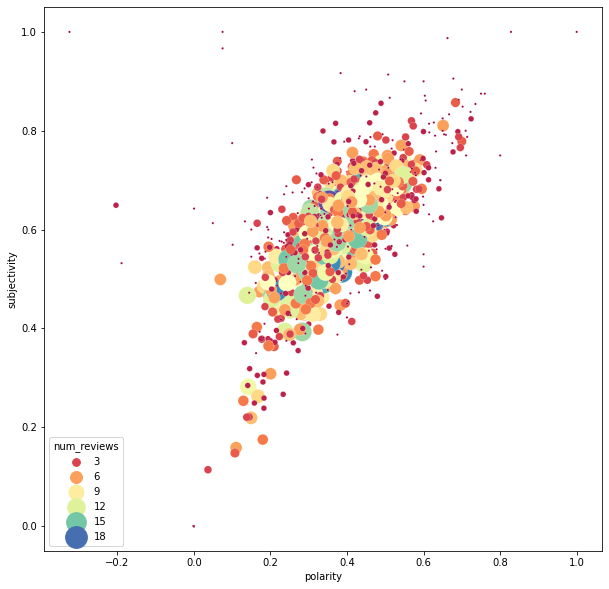

In [259]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x='polarity',y='subjectivity', data=df_reviews[df_reviews.num_reviews<20], hue='num_reviews',palette='Spectral',size='num_reviews',sizes=(5,500));

The first thing we see is that most reviews are positive, since for those listings with a higher number of reviews the mean positivity sits around 0.5. Then we can see that there is a correlation between subjectivity and polarity, which means that as a review increase in positivity in increases in subjectivity also. Taking that into consideration, it is better to check the negative reviews to see if there is something wrong with a listing, since probably that information will be more specific and facts-oriented that the positive reviews.

**Question 2: What is the factor that most influences a listing's price?**

In order to answer this question, we will use our sklearn generated linear model coefficients to evaluate the influence of features on the response

In [260]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [261]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
3,latitude,-265.121190,265.121190
4,longitude,166.069504,166.069504
164,property_type_Boat,130.875223,130.875223
148,neighbourhood_cleansed_South Park,-105.076998,105.076998
91,neighbourhood_cleansed_Dunlap,-74.207098,74.207098
146,neighbourhood_cleansed_South Delridge,-72.348811,72.348811
179,room_type_Shared room,-68.797968,68.797968
149,neighbourhood_cleansed_Southeast Magnolia,67.763335,67.763335
137,neighbourhood_cleansed_Portage Bay,66.617951,66.617951
138,neighbourhood_cleansed_Rainier Beach,-65.622969,65.622969


As we can see, the location related coefficients have the greatest influence on the renting price of a listing, besides, it is not a good idea to stay in a boat for your next vacation if you are on a budget (in that case, reserve a spot on a shared room).

In [269]:
BBox = ((df_lis_sea.longitude.min(),df_lis_sea.longitude.max(),df_lis_sea.latitude.min(), df_lis_sea.latitude.max()))
BBox

(-122.41721881425622,
 -122.24060703053992,
 47.50508834369015,
 47.73335790856483)

In [270]:
map = plt.imread('/content/drive/MyDrive/Colab Notebooks/Udacity/Project 1/map.png')

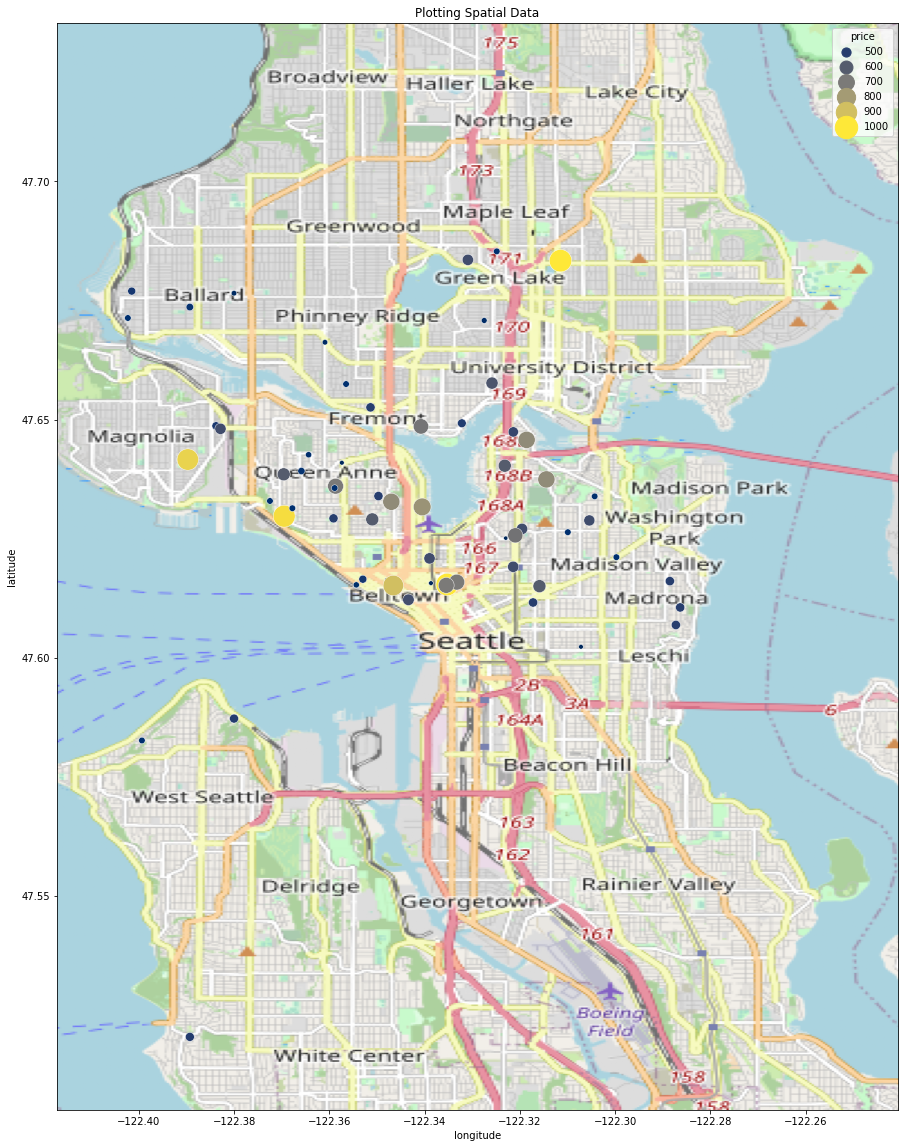

In [272]:
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(x='longitude',y='latitude',hue='price',data=df_lis_sea[df_lis_sea.price>400],palette='cividis',size='price',sizes=(5,500))
#ax.scatter(df_lis_sea.longitude, df_lis_sea.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal');

This map shows us that the priciest locations seem to be located north Seattle, but there seem no to be another clear asociation to proximity to water bobies for example.

**Question 3: If on a very low budget but willing to visiting Seattle, which neighborhood should I visit and in what month?**

First we will find out which month prices are the lowest and then we will find out which neighborhood offer the lowest prices that month

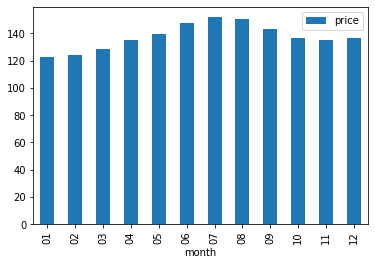

In [262]:
df_cal_sea.groupby(['month']).mean()[['price']].plot(kind='bar');

Definetively January is the slowest month for AirBnB listings in Seattle

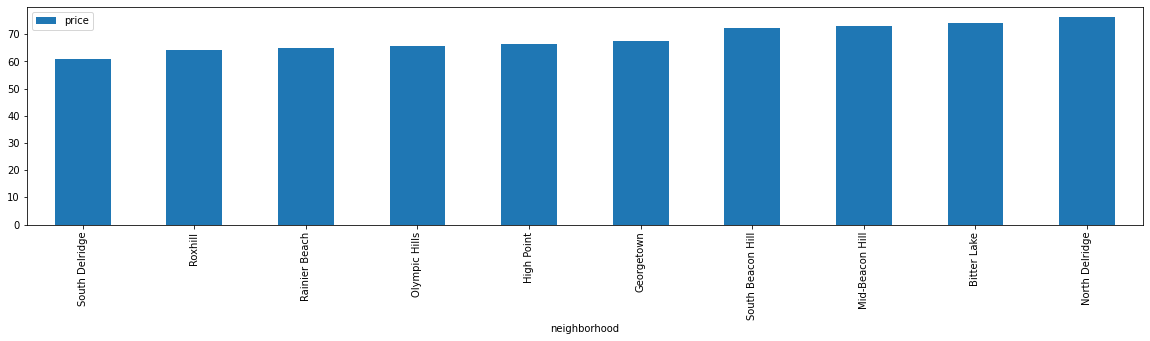

In [263]:
df_cal_sea[df_cal_sea.month == '01'].groupby(['neighborhood']).mean()[['price']].sort_values('price').iloc[:10,:].plot(kind='bar',figsize=(20,4));

And South Delridge is the neighborhood you should pick if you need to spend the least to visit Seattle in January

**Question 4: Is the pricing related to availability?**

In [265]:
df_quantity= df_cal_sea[df_cal_sea.available == 1].groupby(['listing_id']).count()[['date']].rename(columns={'date':'days_available'})

In [266]:
df_price = df_cal_sea[df_cal_sea.available == 1].groupby(['listing_id']).mean()[['price']]

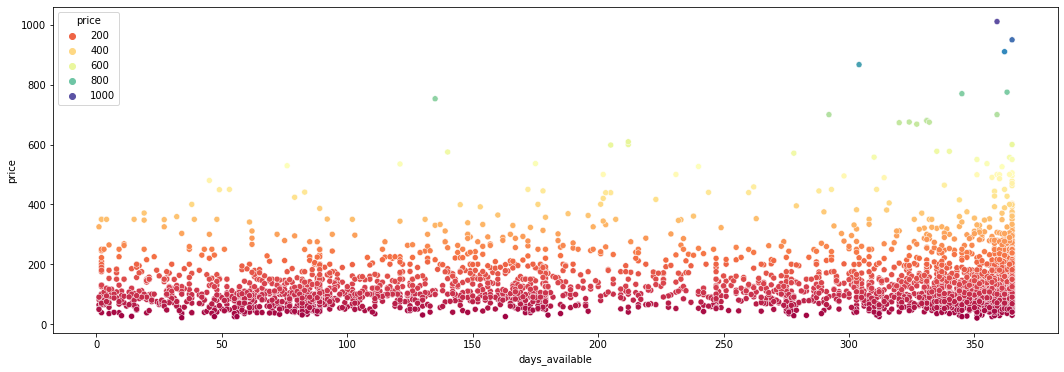

In [267]:
fig = plt.figure(figsize=(18,6))
df_av = pd.concat([df_quantity,df_price],axis=1)
sns.scatterplot(x='days_available',y='price', data=df_av[df_av.price<1200],palette='Spectral',hue='price');

We can see in the histogram above that as we move towards the right, to say, towards the region of listings that are avaliable for most of the year, the prices spread is higher, therefore we could say that the chances of being available increase as the listing increase in price.

**Question 5 Are the prices being modified according to the season?**

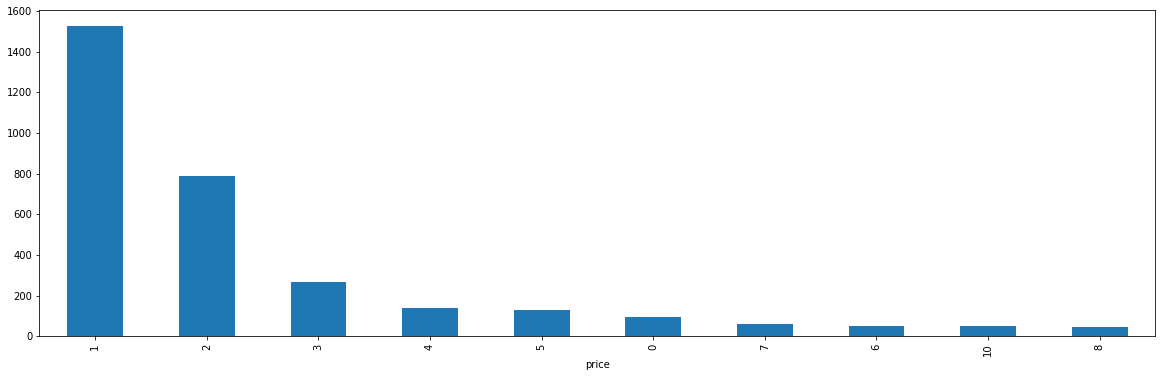

In [268]:
data = df_cal_sea.groupby('listing_id').nunique().groupby('price').count().sort_values('date',ascending=False).date
data.iloc[:10].plot(kind='bar',figsize=(20,6));
# Most listings keep the same price throughout the year or change it a couple times at most 

According to the plot above, most listings keep their prices throughout the year or they change twice a year at most.